In [2]:
%load_ext autoreload
%autoreload 1

In [12]:
import numpy as np
import tensorflow as tf

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 300

In [4]:
from train import Logger

[]

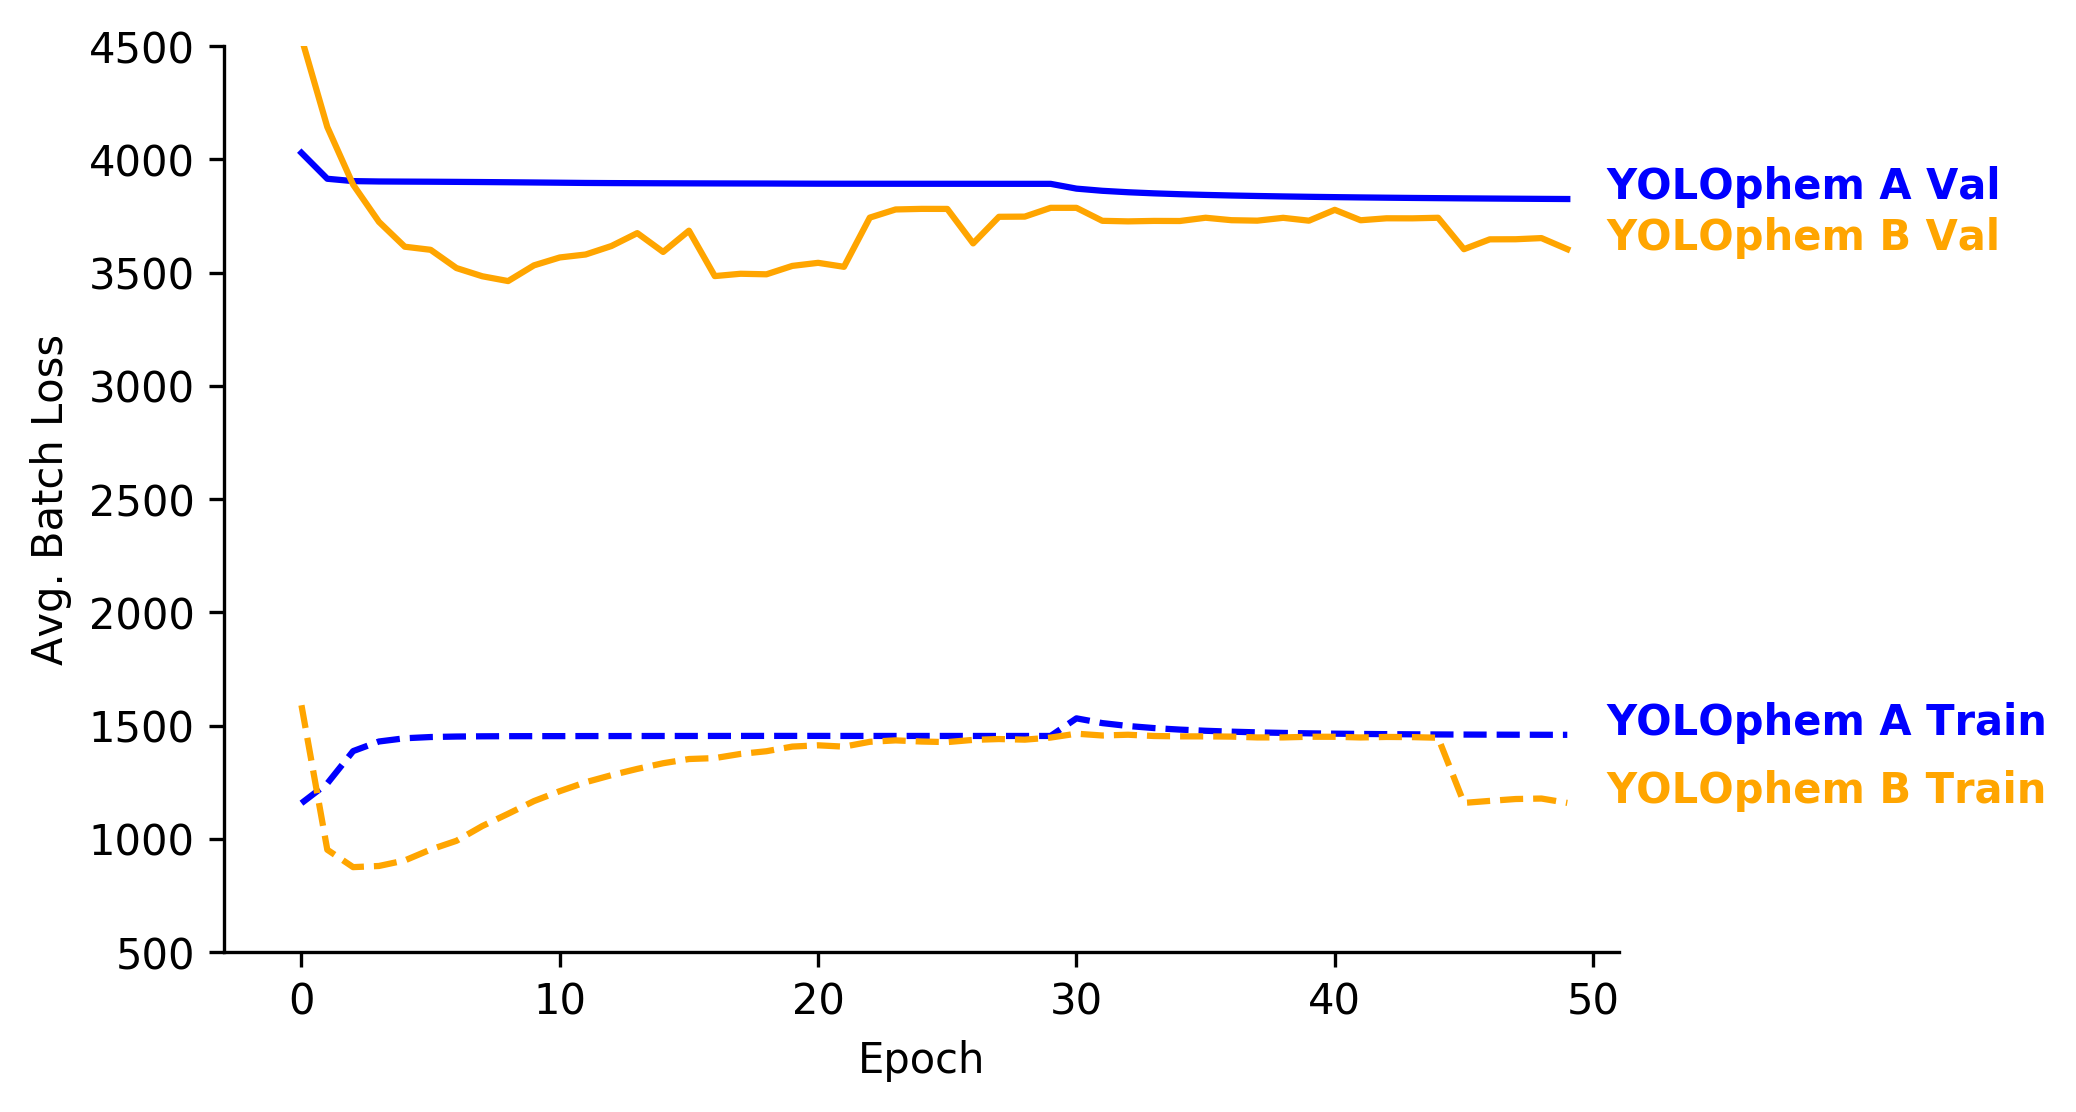

In [13]:
model_A = Logger(logdir='./experiments/yolophem_A_small_2/')

# Divide by the batch size (16) because I forgot that during training. 
# (Shouldn't matter because it's a constant factor, but otherwise the loss appears to be inflated)
val_loss_A = np.array([l for _,l in model_A.log['VAL']]) / 16
train_loss_A = np.array([l for _,l in model_A.log['TRAIN']]) / 16

model_B = Logger(logdir='./experiments/yolophem_B_small/')

val_loss_B = np.array([l for _,l in model_B.log['VAL']]) / 16
train_loss_B = np.array([l for _,l in model_B.log['TRAIN']]) / 16

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()

plt.ylim(500, 4500)
plt.xlim(-3,51)

plt.xlabel('Epoch')
plt.ylabel('Avg. Batch Loss')

plt.plot(val_loss_A, color='blue', linewidth=1.5)
plt.text(50.5, val_loss_A[-1], 'YOLOphem A Val', color='blue', weight='bold')

plt.plot(val_loss_B, color='orange', linewidth=1.5)
plt.text(50.5, val_loss_B[-1], 'YOLOphem B Val', color='orange', weight='bold')

plt.plot(train_loss_A, color='blue', linewidth=1.5, linestyle='dashed')
plt.text(50.5, train_loss_A[-1], 'YOLOphem A Train', color='blue', weight='bold')

plt.plot(train_loss_B, color='orange', linewidth=1.5, linestyle='dashed')
plt.text(50.5, train_loss_B[-1], 'YOLOphem B Train', color='orange', weight='bold')

plt.savefig('loss-curves', bbox_inches='tight')
plt.plot()

In [14]:
logger = Logger(logdir='./experiments/yolophem_B_small_randomized/')

In [17]:
val_loss = np.array([l for _,l in logger.log['VAL']]) / 16
train_loss = np.array([l for _,l in logger.log['TRAIN']]) / 16

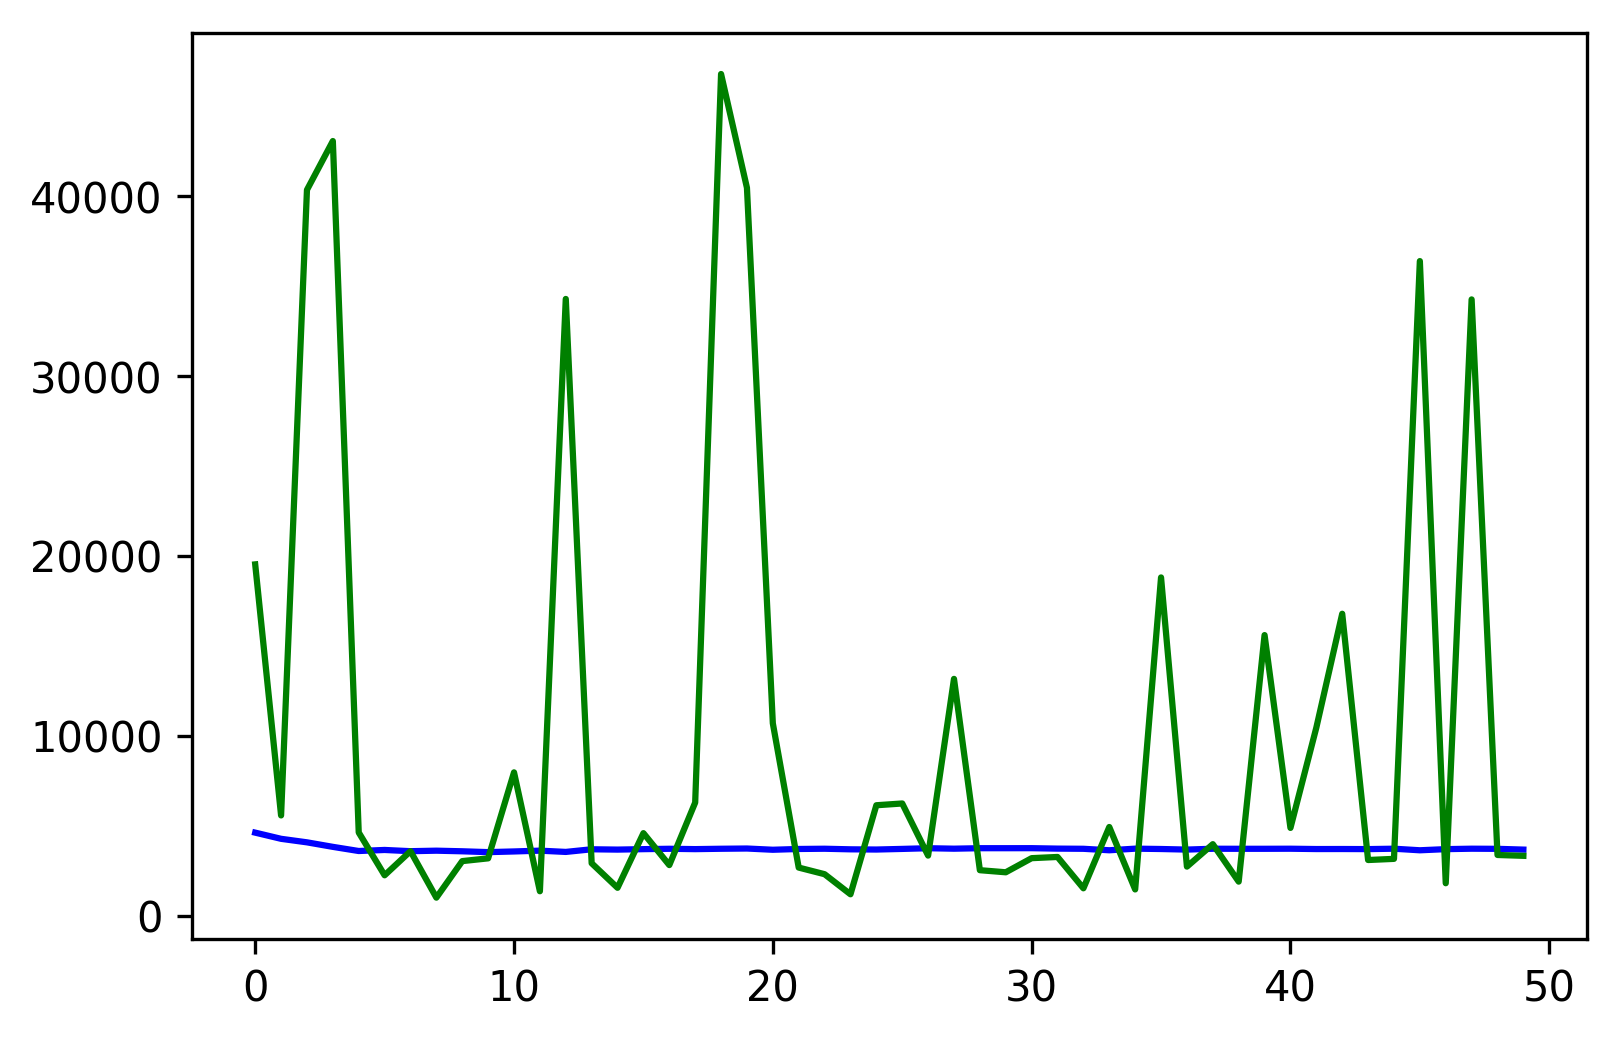

In [18]:
plt.plot(val_loss, 'b')
plt.plot(train_loss, 'g')

plt.show()

## Testing